### CONTEXT:
- A telecom company wants to use their historical customer data and leverage machine learning to predict behaviour in an attempt   to retain customers. The end goal is to develop focused customer retention programs.

### DATA DESCRIPTION
- Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
  - Customers who left within the last month – the column is called Churn.
  - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
  - Pustomer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
  - Demographic info about customers – gender, age range, and if they have partners and dependants.
  
### PROJECT OBJECTIVE:
-  The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer churn and will increase the focus on strategising customer retention.

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Q1 Data Understanding & Exploration:

#### A: Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable

In [4]:
#df1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
df1 = pd.read_csv('/content/drive/MyDrive/AIML_Program/Ensemble Techniques/Project/TelcomCustomer-Churn_1.csv')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


Mounted at /content/drive


#### B: Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [5]:
#df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AIML_Program/Ensemble Techniques/Project/TelcomCustomer-Churn_2.csv')
df2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### C: Merge both the DataFrames on key ‘customerID’ to form a single Dataframe.

In [6]:
df = pd.merge(df1, df2, on="customerID", how="left")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### D: Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [7]:
df1.shape

(7043, 10)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [9]:
df2.shape

(7043, 12)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Use compare operator:TODO

### Q2: Data Cleaning & Analysis:

In [13]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


##### Dataset contains total 7043 rows and 21 columns. There doesnt seems to be any null/missing values. However its observed that Total Charges feature is shown as Object datatype(which is wrong) as against the float type. Lets convert this feature to numeric type.

#### B: Make sure all the variables with continuous values are of ‘Float’ type.

In [21]:
#convert total charges to numeric type.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
#Total charges now shows as float type.

In [25]:
# Check for null values of TotalCharges column now.
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### A: Impute missing/unexpected values in the DataFrame.

#####
- Its observed that for all the rows with NaaN entries for column 'TotaCharges', 'tenure' column shows zeroes even though MonthlyCharges is non null. This seems to be wrong. Looks like data was not available when it was entered. Hence we can remove these entries.
- Its also observed that 'PaymentMethod" column has values as 'automatic' in parenthesis and is too long. We can remove this as it creates issue during label creation.

In [26]:
# Drop observations with null(NaaN) values
df.dropna(inplace=True)

In [27]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [28]:
#Now it doesnt show any NULL values for TotalCharges.

In [29]:
# Get Unique values of the PaymentMethod column
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [30]:
# We can see from above that 'Bank Transfer' and 'Credit Card' values has automatic in parenthesis and we will remove.

In [31]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

#### Customer Id seems to be useless as it doesnt impact in anyway the Customer churn decision and hence removing this column

In [32]:
df.drop(columns='customerID', inplace=True)

In [33]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card,89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer,56.15,3487.95,No


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


#### C: Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

In [35]:
def cat_var_plot(df):
    cat_var = df.select_dtypes(include=['object']).columns.tolist()
    cat_var
    for i, var in enumerate(cat_var):
        plt.subplot(6, 4, i+1)
        df[var].value_counts().plot.pie(fontsize=7, figsize=(20,20), autopct="%1.2f", startangle=90)
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
        plt.gca().set_aspect('equal')

    plt.show()

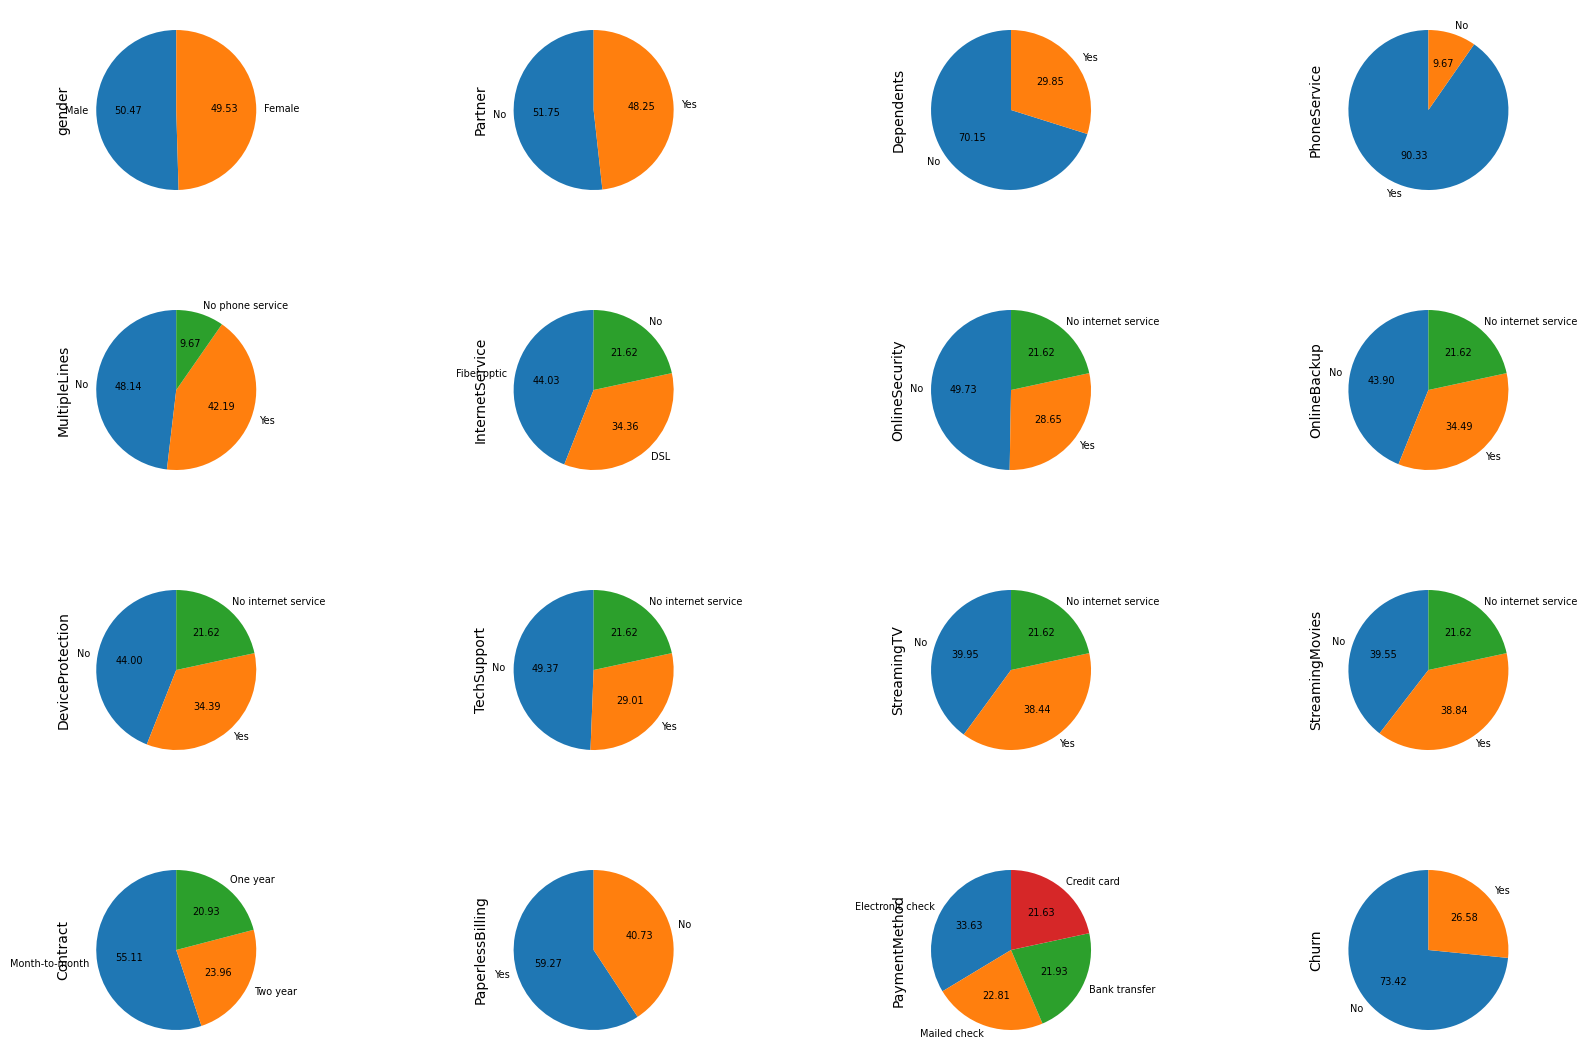

In [36]:
cat_var_plot(df)

#### D: Share insights for Q2.c(Pie charts)

#### Insights from piechart distribution:
- Target variable churn seems to be highly imbalanced data with 27% churn rate vs 73% not churning.
- Customers with dependants(70%) are more than with no dependants(30%).
- Customers who subscribed to PhoneService(90%) are more than customers without any phone service(10%).
- The features like Gender(Male vs Female) are Partner(yes or No)  has approximately equal distribution.
- Customers who didnt suscribe to MultipeLines,  OnlineSecurity, OnlineBackup, Device protection, TechSupport are more than who subscribed.
- Customers who subscribed to FiberOptic Internet Services are more compared to others.
- Customers who subscribed to Month-Month(55%) contract are more compared to one year and two yearcontract options.
- Seems customers who preferred paperless billing(59%) are more than who doesnt.


#### E: Encode all the appropriate Categorical features with the best suitable approach

In [37]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card,89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer,56.15,3487.95,No


####
- Senior Citizen columns is already a binary column and doesnt need modification.
- Lets use Label Encoding to convert all categorical columns having binary variables(yes/no) into numberical labels.
  Gender, Depdendants, Partner, PhoneService, PaperlessBilling, Churn columns needs to be converted using
  label encoding.
- Lets use One-hot encoding for all the other categorical columns to convert each level of categorical variable.

In [42]:
#Use Label encoding to convert Gender, Depdendants, Partner, PhoneService, PaperlessBilling, 'Churn' columns.
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_cols = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_cols:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})


In [43]:
#Lets use One-Hot Encoding for all the other Categorical Columns:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_cols)


In [44]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [45]:
#Import all required libraries.
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### F: Split the data into 80% train and 20% test.

In [46]:
df.groupby(["Churn"]).count()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,
No,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


In [48]:
# Create a separate dataframe consisting only of the features i.e independent attributes
X = df_transformed.drop(labels= "Churn" , axis = 1)
y = df["Churn"]

In [49]:
from sklearn.model_selection import train_test_split

# splitting data into training and test set for independent attributes(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

#### G: Normalize/Standardize the data with the best suitable approach.

#####
- There are multiple normalization/standardization techniques in statistics. We will use the min-max method to rescale the  numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [50]:
# min-max normalization (numeric variables)
min_max_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_cols:
        # min value of the column
        min_column = df_transformed[column].min()
        # max value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)

In [51]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [52]:
# Create a separate dataframe consisting only of the features i.e independent attributes on transformed dataframe.
X_norm = df_transformed.drop(labels= "Churn" , axis = 1)
y_norm = df["Churn"]
X_norm.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [53]:
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(X, y, test_size=.20, random_state=1)


### Q3: Model building and performance improvement.
#### A: Train a model using Decision tree and check the performance of the model on train and test data

In [54]:
#We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_norm_train, y_norm_train)

DecisionTreeClassifier(random_state=1)

In [55]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):

    #model : classifier to predict values of X

    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_norm_train)
    pred_test = model.predict(X_norm_test)

    #Accuracy of the model
    train_acc = model.score(X_norm_train,y_norm_train)
    test_acc = model.score(X_norm_test,y_norm_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_norm_train,pred_train, pos_label="Yes")
    test_recall = metrics.recall_score(y_norm_test,pred_test, pos_label='Yes')

    #Precision of the model
    train_precision = metrics.precision_score(y_norm_train,pred_train, pos_label='Yes')
    test_precision = metrics.precision_score(y_norm_test,pred_test, pos_label='Yes')

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_norm_train,y_norm_train))
        print("Accuracy on test set : ",model.score(X_norm_test,y_norm_test))
        print("Recall on training set : ",metrics.recall_score(y_norm_train,pred_train, pos_label='Yes'))
        print("Recall on test set : ",metrics.recall_score(y_norm_test,pred_test, pos_label='Yes'))
        print("Precision on training set : ",metrics.precision_score(y_norm_train,pred_train, pos_label='Yes'))
        print("Precision on test set : ",metrics.precision_score(y_norm_test,pred_test, pos_label='Yes'))

    return score_list # returning the list with train and test scores

In [56]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_norm_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=['No', 'Yes'])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
#Using get_metrics_score defined function,get accuracy, recall and precision on train and test set
dTree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  0.9976888888888888
Accuracy on test set :  0.720682302771855
Recall on training set :  0.9913506320691949
Recall on test set :  0.4972677595628415
Precision on training set :  1.0
Precision on test set :  0.46547314578005117


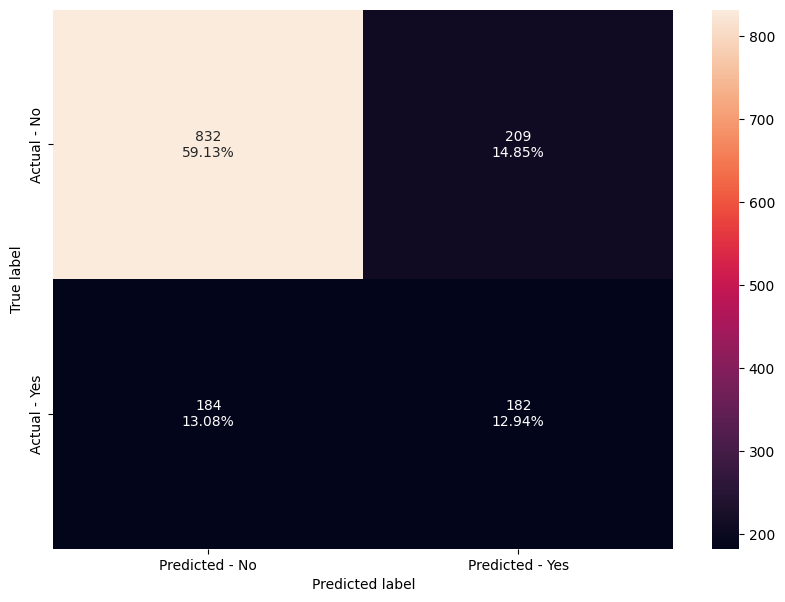

In [58]:
make_confusion_matrix(dTree,y_norm_test)

#### Q3B: Use grid search and improve the performance of the Decision tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.a and Q3.b

In [59]:
# Choose the type of classifier.
dTree_estimator_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_estimator_tuned, parameters, scoring=acc_scorer, verbose=1, cv=5)
grid_obj = grid_obj.fit(X_norm_train, y_norm_train)

# Set the clf to the best combination of parameters
dTree_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_estimator_tuned.fit(X_norm_train, y_norm_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


DecisionTreeClassifier(max_depth=3, random_state=1)

##### Let's check different metrics for DecisionTree classifier with best hyperparameters and build a confusion matrix.

In [60]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_estimator_tuned_score=get_metrics_score(dTree_estimator_tuned)

Accuracy on training set :  0.7909333333333334
Accuracy on test set :  0.7903340440653873
Recall on training set :  0.3819028609447771
Recall on test set :  0.3907103825136612
Precision on training set :  0.6991473812423873
Precision on test set :  0.6651162790697674


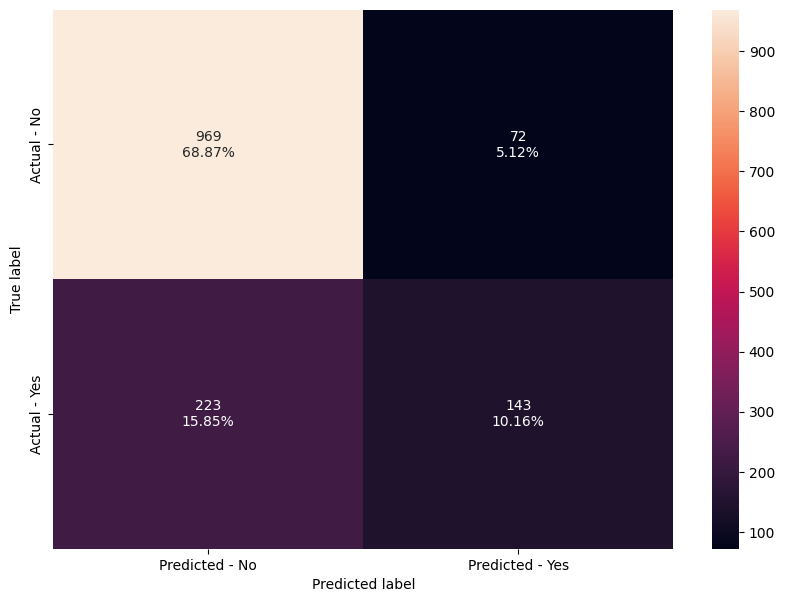

In [61]:
make_confusion_matrix(dTree_estimator_tuned,y_norm_test)

#### Observations/Differences on performance between Models on Q3A(Base decision tree model) and Q3B(decision tree model with grid search):
- On Base Decision Tree model, Accuracy on training set is high(99%) and low with test data(72%) which indicates model is highly over fitting.
- Similarly Precision(1.0) and Recall(99%) scores are high on training data but low on testing data(49%, 46%) with base model. For this specific dataset, Recall accuracy is most important which is pretty low with this model.
- With second model(Decision Trees with GridSearch and hyperparameter tuning), we see Training accuracy(79%) is low compared to base model but however testing accuracy(79%) improved compared to base model. Training and Test accuracies are matching which is good.
- With Second model, it seems Precision Accuracy(66%) for test data seems to be improved from base model however Recall score is quite low(38%, 39%) for this model which is a key metric for the given dataset.
- Overall Base Decision Tree Model seems to be highly over fitting while Decison Tree with Gridsearch/Hyperparameter tuning model performs low on Recall score although it has improved test accuracy. Hence both these models are not suitable for the given dataset and needs to consider few other models to carry out performance improvements.


#### Q3C:Train a model using Random forest and check the performance of the model on train and test data

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
random_forest_clf = random_forest_clf.fit(X_norm_train, y_norm_train)

In [63]:
#Using get_metrics_score defined function,get accuracy, recall and precision on train and test set
rfcl_estimator_score=get_metrics_score(random_forest_clf)

Accuracy on training set :  0.9971555555555556
Accuracy on test set :  0.7867803837953091
Recall on training set :  0.9926813040585496
Recall on test set :  0.47540983606557374
Precision on training set :  0.9966599866399466
Precision on test set :  0.6170212765957447


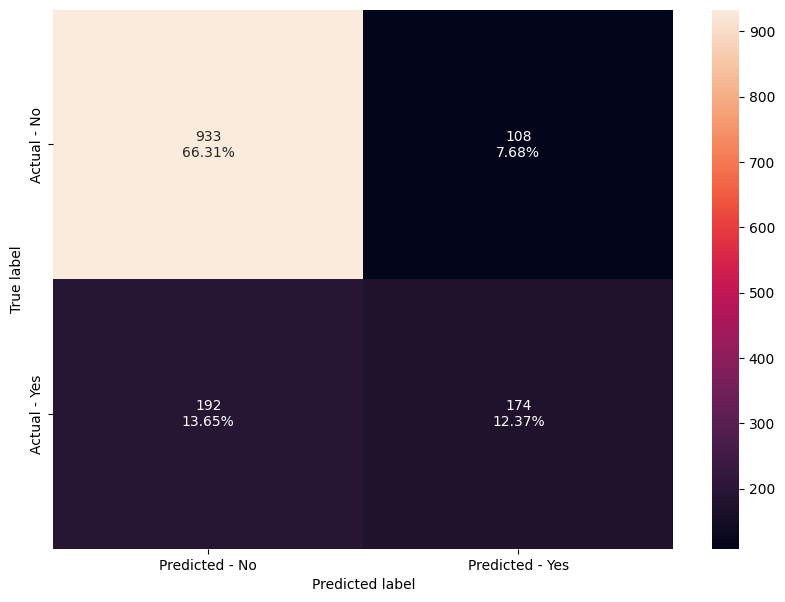

In [64]:
make_confusion_matrix(random_forest_clf,y_norm_test)

#### Q3D: Use grid search and improve the performance of the Random Forest tree model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.c and Q3.d

##### Lets check the performance with Gridsearch(w/ Hyperparameters) on RandomForestModel

In [65]:
# Choose the type of classifier.
random_forest_clf_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [50,100,150],
              "min_samples_leaf": np.arange(5, 10),
              "max_features": np.arange(0.2, 0.7, 0.1),
              "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(random_forest_clf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_norm_train, y_norm_train)

# Set the clf to the best combination of parameters
random_forest_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
random_forest_clf_tuned.fit(X_norm_train, y_norm_train)

RandomForestClassifier(max_features=0.2, max_samples=0.3, min_samples_leaf=5,
                       n_estimators=50, random_state=1)

In [67]:
#Using above defined function to get accuracy, recall and precision on train and test set
random_forest_clf_tuned_score=get_metrics_score(random_forest_clf_tuned)

Accuracy on training set :  0.8355555555555556
Accuracy on test set :  0.7967306325515281
Recall on training set :  0.5675316034597472
Recall on test set :  0.46994535519125685
Precision on training set :  0.7562056737588653
Precision on test set :  0.6515151515151515


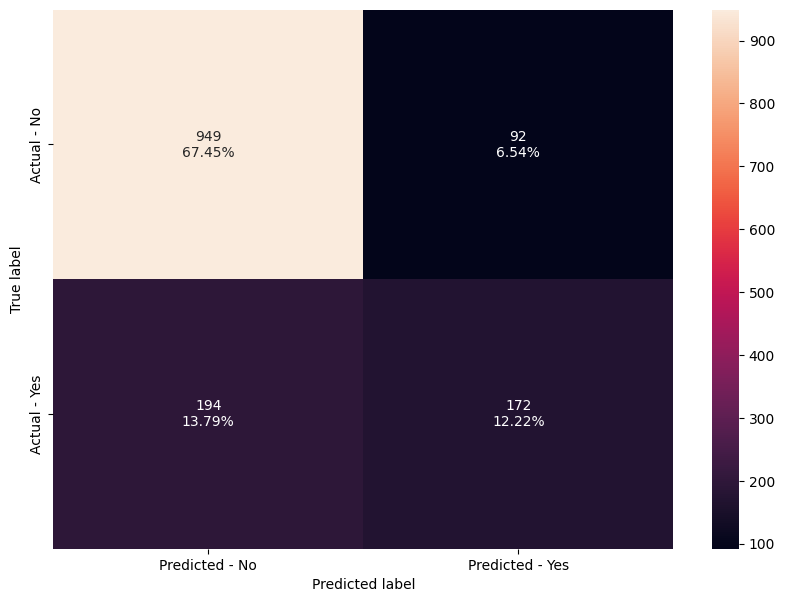

In [68]:
make_confusion_matrix(random_forest_clf_tuned,y_norm_test)


#### Observations/Differences on performance between Models on Q3C(RandomForest  model) and Q3B(RandomForest w/ Gridsearch model):
- On Base RandomForest Model, Accuracy on training set is high(99%) and low with test data(79%) which indicates model is highly over fitting.
- Similarly Precision(99.6%) and Recall(99%) scores are high on training data but low on testing data(62%, 47%) with base model. For this specific dataset, Recall accuracy is most important which is pretty low with this model.
- With second model(RandomForest with GridSearch and hyperparameter tuning), we see Training accuracy(83%) is low compared to base model but however testing accuracy(80%) have slight improvement compared to base model. Training and Test accuracies are matching which is good.
- With Second model, it seems Precision Accuracy(65%) for test data seems to be improved from base model however Recall score is low(47%) on test data for this model which is a key metric for the given dataset.
- Overall Base RandomForest Model seems to be highly over fitting while with Gridsearch/Hyperparameter tuning model performs low on Recall score although it has improved test accuracy. Lets explore few more models to carry out performance improvements.


#### Q3E: Train a model using Adaboost and check the performance of the model on train and test data .

In [69]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
adaboost_clf = adaboost_clf.fit(X_norm_train, y_norm_train)

In [70]:
#Using get_metrics_score defined function,get accuracy, recall and precision on train and test set
adaboost_estimator_score=get_metrics_score(adaboost_clf)

Accuracy on training set :  0.7971555555555555
Accuracy on test set :  0.8002842928216063
Recall on training set :  0.5528942115768463
Recall on test set :  0.546448087431694
Precision on training set :  0.6392307692307693
Precision on test set :  0.6349206349206349


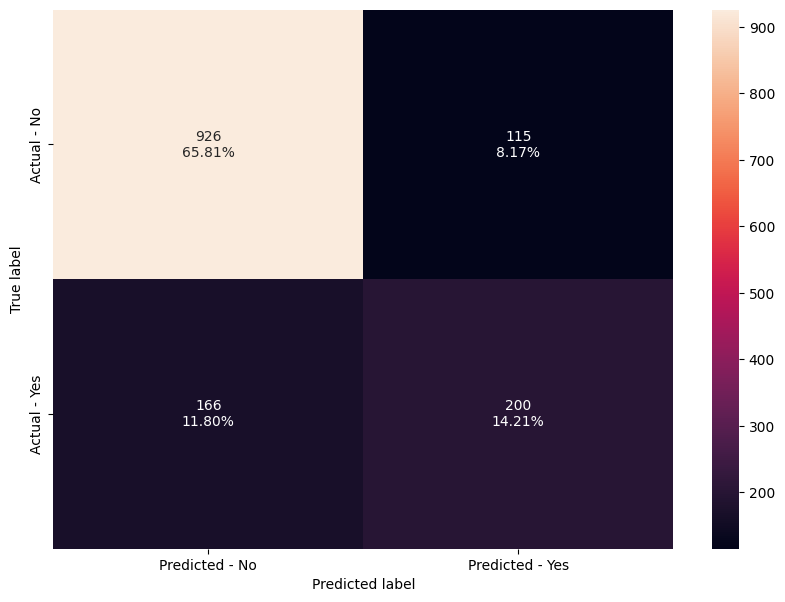

In [71]:
make_confusion_matrix(adaboost_clf,y_norm_test)

#### Q3F:Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.e and Q3.f

In [72]:
#Adaboost with Gridsearch and hyper parameter tuning.
# Choose the type of classifier.
adaboost_clf_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
              "learning_rate": [(0.97 + x / 100) for x in range(0, 8)],
              "algorithm": ['SAMME']
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(adaboost_clf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_norm_train, y_norm_train)

# Set the clf to the best combination of parameters
adaboost_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adaboost_clf_tuned.fit(X_norm_train, y_norm_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.97, n_estimators=2,
                   random_state=1)

In [73]:
#Using above defined function to get accuracy, recall and precision on train and test set
adaboost_clf_tuned_score=get_metrics_score(adaboost_clf_tuned)

Accuracy on training set :  0.7328
Accuracy on test set :  0.7398720682302772
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0


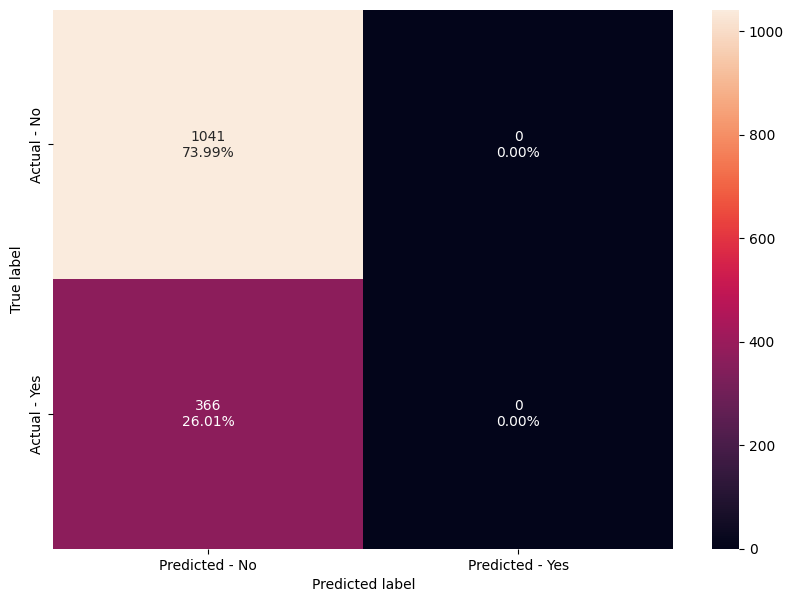

In [74]:
make_confusion_matrix(adaboost_clf_tuned,y_norm_test)

#### Observations/Differences on performance between Models on Q3E(Adaboost base  model) and Q3F(Adaboost w/ Gridsearch and hyperparameters model):

- On Base Adaboost Model, Accuracy on training set and test set are almost same(80%) which indicates model is not over fitting and is correctly fitting.
- Similarly Precision(64%) and Recall scores(55%) are also almost same on training and test datadata. For this specific dataset, Recall accuracy is most important which is pretty low with this model.
- With second model(Adaboost with GridSearch and hyperparameter tuning), we see Training and Test accuracy(73%) are almost same but accuracy is low compared to base model.
- With Second model, it seems Precision And Recall scores are zero on both training and test datasets. This is because the model has no true positives, marking the classifier as useless as it was unable to make even one correct positive prediction.
- Overall Base Adaboost Model seems to be better interms of accuracy compared to Later model. Adaboost with Gridsearch and hyperparameter tuning model is useless as it couldnt predict Customers who churned. For Base model, Recall score is seems to be bit low. Lets consider few other models to carry out performance improvements.

#### Q3G: Train a model using GradientBoost and check the performance of the model on train and test data

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gr_boost_clf = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gr_boost_clf = gr_boost_clf.fit(X_norm_train, y_norm_train)

In [76]:
#Using get_metrics_score defined function,get accuracy, recall and precision on train and test set
grboost_estimator_score=get_metrics_score(gr_boost_clf)

Accuracy on training set :  0.8199111111111111
Accuracy on test set :  0.7953091684434968
Recall on training set :  0.5535595475715236
Recall on test set :  0.4781420765027322
Precision on training set :  0.7086882453151618
Precision on test set :  0.6433823529411765


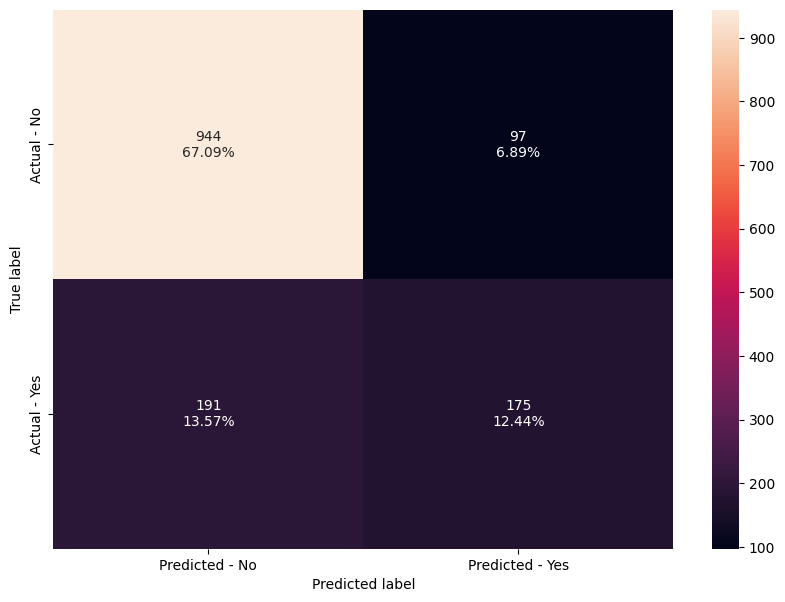

In [77]:
make_confusion_matrix(gr_boost_clf,y_norm_test)

#### Q3H: Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train and test data , provide the differences observed in performance in Q3.g and Q3.h.

In [79]:
#Gradient boost with Gridsearch and hyper parameter tuning.
# Choose the type of classifier.
gr_boost_clf_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [1, 2, 4, 8, 16, 32, 64, 100, 200],
              "max_depth": [3, 4, 5],
              "min_samples_split": np.linspace(0.1, 1.0, 10, endpoint=True),
              "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
              "max_features": ["log2", "sqrt"],
              "learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gr_boost_clf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_norm_train, y_norm_train)

# Set the clf to the best combination of parameters
gr_boost_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gr_boost_clf_tuned.fit(X_norm_train, y_norm_train)

GradientBoostingClassifier(learning_rate=1, max_features='log2',
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           n_estimators=1, random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gr_boost_clf_tuned_score=get_metrics_score(gr_boost_clf_tuned)

In [ ]:
make_confusion_matrix(gr_boost_clf_tuned,y_norm_test)

#### Q3I: Provide detailed analysis of the below steps:
- 1. Compare the performance of each model in train stage and test stage
- 2. Provide your observation on which model performed the best
- 3. Provide your reasoning on why the model performed best
- 4. Provide your final conclusion on your observation

##### Lets check the feature importance

In [ ]:
importances = random_forest_clf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### Q3I.1 Comparing the performance of each model in train stage and test stage using below  function calls:

In [ ]:
# defining list of models
models = [dTree, dTree_estimator_tuned, random_forest_clf, random_forest_clf_tuned, adaboost_clf, adaboost_clf_tuned,
          gr_boost_clf, gr_boost_clf_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [ ]:
comparison_frame = pd.DataFrame({'Model':['dTree classifier w/ default parameters', 'dTree Classifier w/ Gridsearch',
                                        'Random Forest classifier w/ default parameters', 'Random Forest w/ Gridsearch',
                                         'Adaboost Classifier w/ default parameters', 'Adaboost w/ Gridsearch',
                                         'Gradient Boost Classifier w/ default parameters', 'Gradient Boost w/ Gridsearch'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
comparison_frame

##### Q3I.2:  Provide your observation on which model performed the best

##### Q3I.3 Provide your reasoning on why the model performed best

##### Q3I.4  Provide your final conclusion on your observation